In [1]:
#setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sb
import scipy.optimize as optimization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#read in data for asteroids
df_ast = pd.read_csv('results-8.csv')
df_ast.columns

/Users/brandonhuff/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['H', 'M1', 'diameter', 'H_sigma', 'diameter_sigma', 'e', 'a', 'q',
       'sigma_e', 'sigma_a', 'sigma_q'],
      dtype='object')

In [3]:
#create new cloumns of log values
df_ast['log_a'] = np.log10(df_ast.a)
df_ast['log_q'] = np.log10(df_ast.q)
df_ast['type'] = 'Ast'
df_ast.columns

/Users/brandonhuff/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Index(['H', 'M1', 'diameter', 'H_sigma', 'diameter_sigma', 'e', 'a', 'q',
       'sigma_e', 'sigma_a', 'sigma_q', 'log_a', 'log_q', 'type'],
      dtype='object')

In [4]:
#read in data for comets
df_com = pd.read_csv('results-9.csv')
df_com['type'] = 'Com'
df_com.columns

Index(['H', 'M1', 'diameter', 'H_sigma', 'diameter_sigma', 'e', 'a', 'q',
       'sigma_e', 'sigma_a', 'sigma_q', 'type'],
      dtype='object')

In [5]:
#create log values for comets
df_com['log_a'] = np.log10(df_com.a)
df_com.columns

Index(['H', 'M1', 'diameter', 'H_sigma', 'diameter_sigma', 'e', 'a', 'q',
       'sigma_e', 'sigma_a', 'sigma_q', 'type', 'log_a'],
      dtype='object')

/Users/brandonhuff/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0

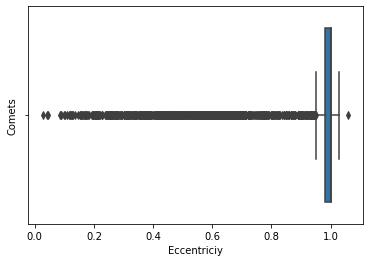

In [6]:
#boxplot of comet eccentricities
sb.boxplot(df_com['e'])
plt.savefig('1 - e of comets')
plt.xlabel('Eccentriciy')
plt.ylabel('Comets')
np.median(df_com['e'])

/Users/brandonhuff/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.14427930098334774

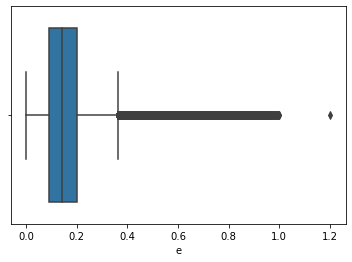

In [7]:
#boxplot of asteroid eccentricities
sb.boxplot(df_ast['e'])
plt.savefig('2 - e of asteroids')
np.median(df_ast['e'])

In [8]:
df_both = df_ast

In [9]:
#remove NaN values from asteroid database
df_ast1 = df_ast.dropna(axis = 0, how='any', subset = ('e', 'a', 'q'))

In [10]:
#remove NaN values from comet database
df_com1 = df_com.dropna(axis = 0, how='any', subset = ('e', 'a', 'q'))
len(df_com1)

1733

In [11]:
#remove negative semi-major axis values
df_com_pos = df_com1[df_com1['a']>0]
len(df_com_pos)

1385

In [12]:
#remove negative semi-major axis values
df_ast_pos = df_ast1[df_ast1['a']>0]
len(df_ast_pos)

794830

In [13]:
#correlation coefficient value for asteroid eccentricity and semi-major axis
st.pearsonr(df_ast1['e'], df_ast1['a'])

(0.0626611725549095, 0.0)

In [14]:
#correlation coefficient value for comet eccentricity and semi-major axis
st.pearsonr(df_com1['e'], df_com1['q'])

(-0.12836850567890767, 8.21980841358466e-08)

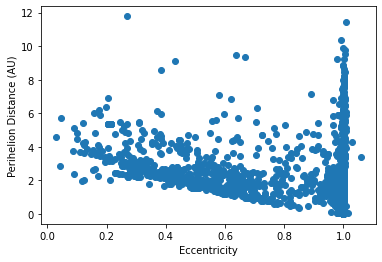

In [15]:
#scatterplot of comet eccentricity vs perihelion distance
plt.scatter(df_com['e'], df_com['q'])
plt.xlabel('Eccentricity')
plt.ylabel('Perihelion Distance (AU)')
plt.savefig('3 - e vs q, comets')

In [16]:
#breakup the asteroids into far and close databases
df_ast_far = df_ast1[df_ast1['log_a']>.75]
df_ast_close = df_ast1[df_ast1['log_a']<=.75]

/Users/brandonhuff/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.6393424906523362

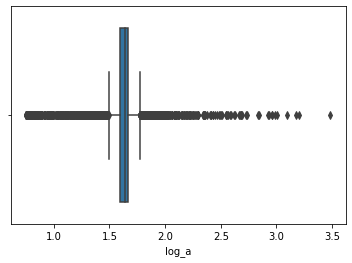

In [17]:
#boxplot of just far asteroids
sb.boxplot(df_ast_far['log_a'])
np.median(df_ast_far['log_a'])

In [18]:
print(np.median(df_com1['e']))
print(np.median(df_ast_far['e']))

0.973619470138512
0.16915625698594355


In [19]:
print(np.median(df_com['q']))
print(np.median(df_ast_far['q']))

0.6793485006270831
36.744679367487066


In [20]:
print(np.mean(df_com1['log_a']))
print(np.median(df_ast_far['log_a']))

1.5377337484720284
1.6393424906523362


In [21]:
len(df_ast1['log_a'])

794831

In [22]:
np.median(df_ast1.a)

2.64222756620852

In [23]:
#combine the far asteroid database with the comet database
df_both = df_ast_far.append(df_com_pos, ignore_index = 'true', sort= 'false')
len(df_both)

5103

Text(0, 0.5, 'Type')

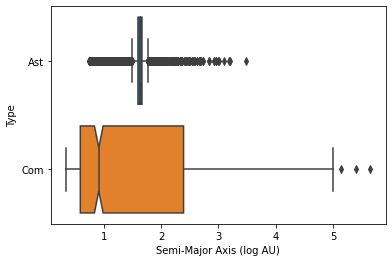

In [24]:
#boxplot of both far asteroids and comets semi-major axis values
sb.boxplot(x=df_both['log_a'], y=df_both['type'], notch = 'true')
plt.xlabel('Semi-Major Axis (log AU)')
plt.ylabel('Type')

5103

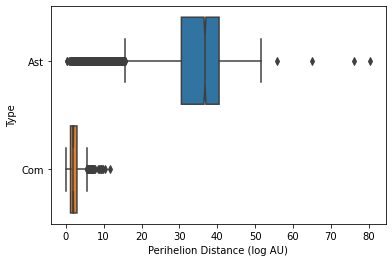

In [25]:
#boxplot of both far asteroids and comets perihelion distance values

sb.boxplot(x=df_both['q'], y=df_both['type'], notch = 'true')
plt.xlabel('Perihelion Distance (log AU)')
plt.ylabel('Type')
len(df_both)

Text(0, 0.5, 'Type')

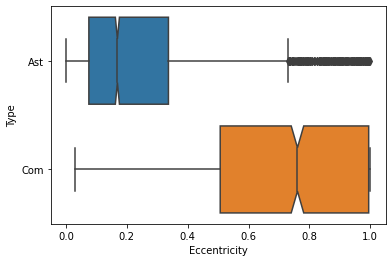

In [26]:
#boxplot of both far asteroids and comets eccentricity values


sb.boxplot(x=df_both['e'], y=df_both['type'], notch = 'true')
plt.xlabel('Eccentricity')
plt.ylabel('Type')

Text(0.5, 1.0, 'Distribution of Comet Semi-Major Axis values')

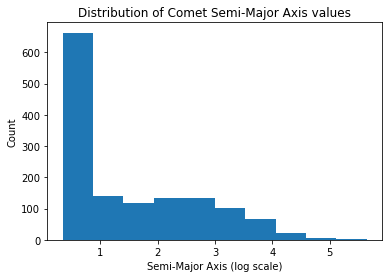

In [27]:
#histogram showing distribution of comet semi-major axis values
plt.hist(df_com_pos['log_a'])
plt.xlabel('Semi-Major Axis (log scale)')
plt.ylabel('Count')
plt.title('Distribution of Comet Semi-Major Axis values')

Text(0, 0.5, 'Count')

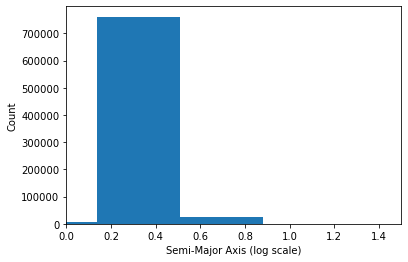

In [28]:
#histogram showing distribution of asteroid semi-major axis values


plt.hist(df_ast_pos['log_a'])
plt.xlim(0,1.5)
plt.xlabel('Semi-Major Axis (log scale)')
plt.ylabel('Count')

/Users/brandonhuff/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='e', ylabel='Density'>

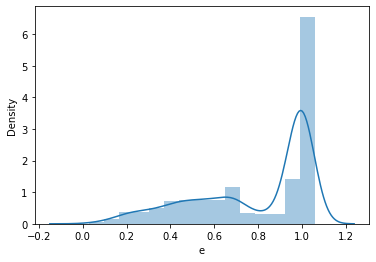

In [29]:
#distribution plot for comet eccentricities
sb.distplot(df_com1['e'])


/Users/brandonhuff/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_a', ylabel='Density'>

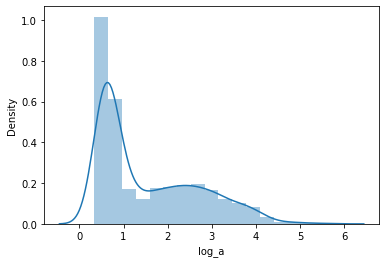

In [30]:
#distribution plot for comet log semi-major axis values


sb.distplot(df_com_pos['log_a'])

/Users/brandonhuff/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_a', ylabel='Density'>

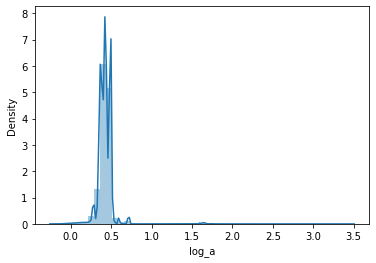

In [31]:
#distribution plot for asteroid semi-major axis values


sb.distplot(df_ast_pos['log_a'])

In [32]:
def slopefunc(x,sl):
    return sl*x

#line with an intercept
def slopeintfunc(x,sl,incpt):
    return sl*x+incpt

#we could continue this to functions of arbitraty order
#for example, quadratic:

def quadfunc(x,a,b,c):
    return a+b*x+c*x*x

Text(0, 0.5, 'Semi Major Axis AU (log scale)')

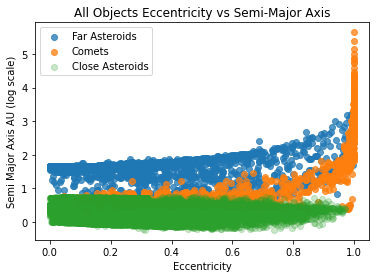

In [33]:
#scatterplot of all points, but distinguish between far asteroids, close asteroids, and comets using color. 
#sxes compare eccentricity and semi-major axis values
plt.scatter(df_ast_far['e'], df_ast_far['log_a'], marker='o', alpha=.75, label='Far Asteroids')
plt.scatter(df_com_pos['e'], df_com_pos['log_a'], marker='o', alpha=.75, label='Comets')
plt.scatter(df_ast_close['e'], df_ast_close['log_a'], marker='o', alpha=.25, label='Close Asteroids')
plt.legend()
plt.title('All Objects Eccentricity vs Semi-Major Axis')
plt.xlabel('Eccentricity')
plt.ylabel('Semi Major Axis AU (log scale)')

In [34]:
#remove NaN log values
df_ast_logs = df_ast1.dropna(axis = 0, how='any', subset = ('log_a', 'log_q'))
len(df_ast_logs)

794830

In [35]:
#take mean values for semi-major axis and perihelion distance of comets
sma_mean = np.mean(df_com_pos['log_a'])
peri_mean = np.mean(np.log10(df_com_pos['q']))

In [36]:
#calculate covariance
covar = np.cov(df_com_pos['log_a'], np.log10(df_com_pos['q']))

In [37]:
#create a random sample of 3000 comets based off the values from the data
norm = np.random.multivariate_normal(mean = (sma_mean, peri_mean), cov = covar, size =3000)

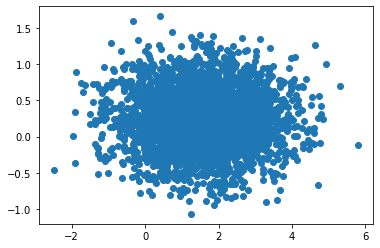

In [38]:
#plot the new, fake comets
plt.scatter(norm[:,0], norm[:,1])

In [39]:
#create line of best fit for asteroids log semi-major axis and log perihelion distance
fit = optimization.curve_fit(slopeintfunc,df_ast_logs['log_a'],df_ast_logs['log_q'])
fit[0][0]

1.0232551575734208

Text(0.5, 1.0, 'All Objects Semi-Major Axis vs Perihelion')

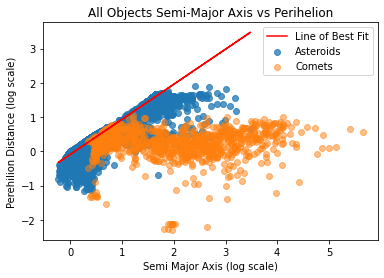

In [40]:
#scatterplot of all points, asteroids and comets distinguished by colors. x-axis shows semi-major axis values,
#y-axis shows perihelion distance
#line of best fit for asteroids to show difference in patterns
plt.scatter(df_ast_logs['log_a'], np.log10(df_ast_logs['q']), marker='o', alpha=.75, label='Asteroids')
fit = optimization.curve_fit(slopeintfunc,df_ast_logs['log_a'],df_ast_logs['log_q'])
plt.plot(df_ast_logs['log_a'], slopeintfunc(df_ast_logs['log_a'],fit[0][0],fit[0][1]), color = 'r', label="Line of Best Fit")
plt.scatter(df_com_pos['log_a'], np.log10(df_com_pos['q']), marker='o', alpha=.5, label='Comets')
plt.xlabel('Semi Major Axis (log scale)')
plt.ylabel('Perehilion Distance (log scale)')
plt.legend()
plt.title('All Objects Semi-Major Axis vs Perihelion')
#plt.scatter(df_ast_close['log_a'], np.log10(df_ast_close['q']), marker='o', alpha=.25)

In [41]:
#correlation coefficient for asteroid semi-major axis and perihelion distance
st.pearsonr(df_ast1['a'], df_ast1['q'])

(0.48327982909912626, 0.0)

In [42]:
#correlation coefficient for comet semi-major axis and perihelion distance


st.pearsonr(df_com1['a'], df_com1['q'])

(-0.08219595910068653, 0.0006145968294560783)

In [43]:
def comet_sim(n, semi_major_axis, perihelion):
    """
    This function creates a desired number of randomly generated samples of comets based off of the comet data. It 
    creates 3000 comets per sample, and then reocrds the slope and correlation coefficient for the relationship between
    the comets' semi-major axis and perihelion distance values. It returns each slope and r-value in an array.
    """
    sma_dist = np.mean(semi_major_axis)
    peri_mean = np.mean(perihelion)
    covariance = np.cov(semi_major_axis, perihelion)
    slope_and_r = []
    for i in range(n):
        norm = np.random.multivariate_normal(mean = (sma_dist, peri_mean), cov = covariance, size = 3000)
        fit = optimization.curve_fit(slopeintfunc,norm[:,0], norm[:,1])
        slope_and_r.append((fit[0][0],st.pearsonr(norm[:,0], norm[:,1])[0]))
    return np.array(slope_and_r)

In [44]:
#create array of 10,000 slopes and r-values of randomly generated comets
com_array = comet_sim(10000, df_com_pos['log_a'], np.log10(df_com_pos['q']))
com_array.shape

(10000, 2)

/Users/brandonhuff/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sampling Distribution of Correlation Coefficients')

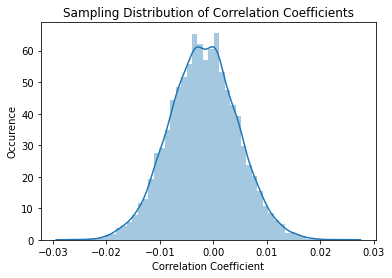

In [45]:
#distribution plot of all of the correlation coefficients from the 10,000 samples
sb.distplot(com_array[:,0])
uo = (np.mean(com_array[:,0]))
std = (np.std(com_array[:,0]))
plt.xlabel('Correlation Coefficient')
plt.ylabel('Occurence')
plt.title('Sampling Distribution of Correlation Coefficients')

In [46]:
#calculate z-score value to test likelihook of getting correlation coefficient of asteroids in the random sample generator
z = ((fit[0][0])- uo)/(std/np.sqrt(len(com_array)))
z

16148.813766150228

In [47]:
uo

-0.0018924578179049434